# First let's just import the libraries

In [1]:
import pandas as pd
import os

In [ ]:
#Now we will import our csv file.
#Aim for the project is to find number of deaths

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/aggregate_covid_country.csv')
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [16]:
#code to check the unique values in a particular columns.
df['Country'].value_counts()

Sweden      126
Turkey      126
Libya       126
Uruguay     126
Belarus     126
           ... 
Cuba        126
Burma       126
Thailand    126
Bahamas     126
Albania     126
Name: Country, Length: 188, dtype: int64

In [3]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [4]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [6]:
#code so that we can check if there is any  null value or not.
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [8]:
#importing libraries for graph and to observe the correlation of data.
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt


<function matplotlib.pyplot.show(*args, **kw)>

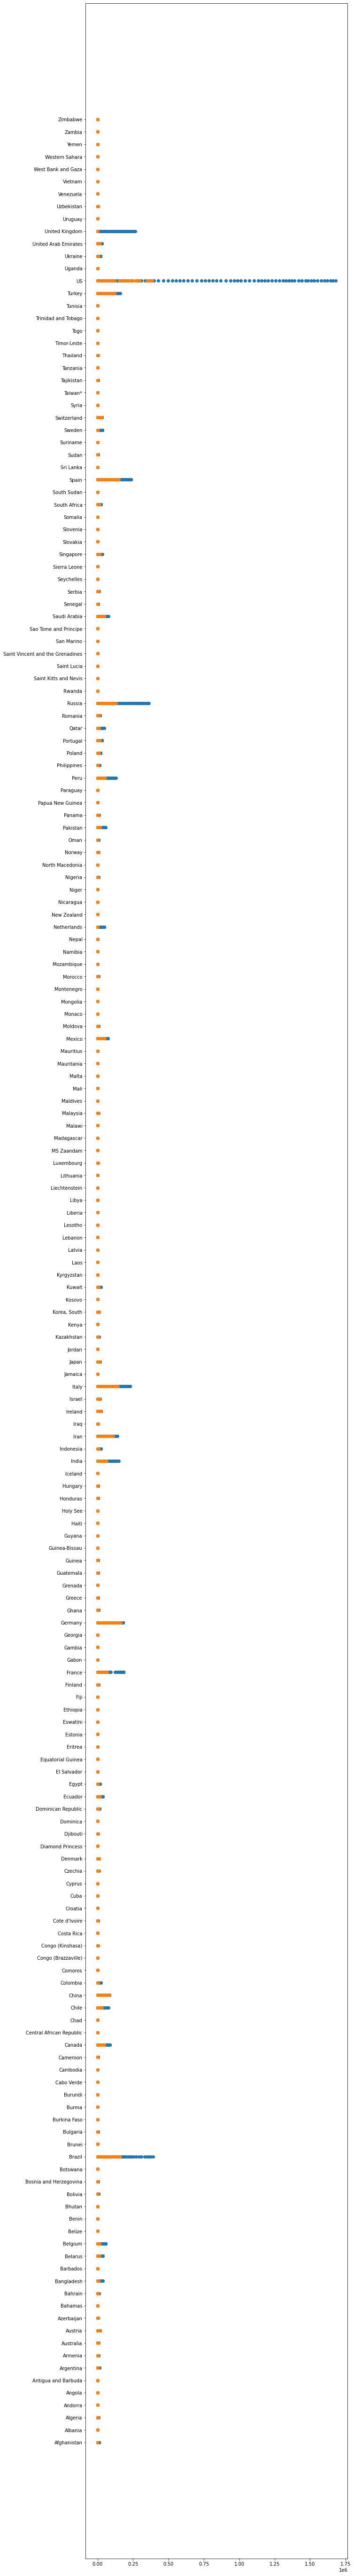

In [9]:
plt.figure(figsize=(10,100))
plt.scatter(x="Confirmed",y="Country",data=df)
plt.scatter(x="Recovered",y="Country",data=df)
plt.show

<Figure size 3600x1440 with 0 Axes>

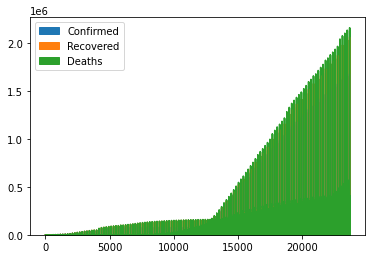

<Figure size 3600x1440 with 0 Axes>

In [10]:
df.plot.area()
plt.figure(figsize=(50,20))

<Figure size 720x5760 with 0 Axes>

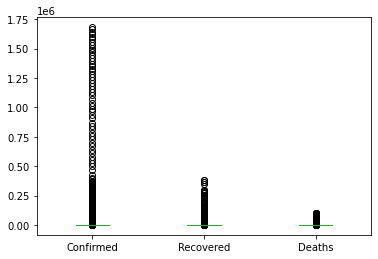

<Figure size 720x5760 with 0 Axes>

In [11]:
df.plot.box()
plt.figure(figsize=(10,80))

In [12]:
df.corr()

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.810991,0.929718
Recovered,0.810991,1.000000,0.778094
Deaths,0.929718,0.778094,1.000000


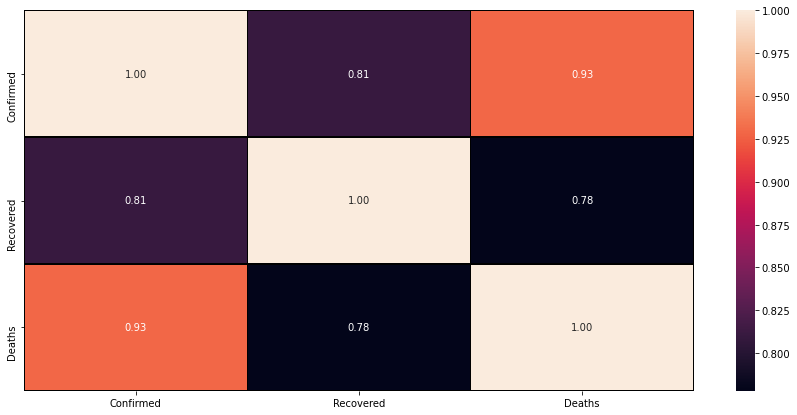

In [13]:
plt.figure(figsize=(15,7))
sn.heatmap(df.corr(),annot=True, linewidth=0.5, linecolor="black",fmt='.2f')

In [14]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

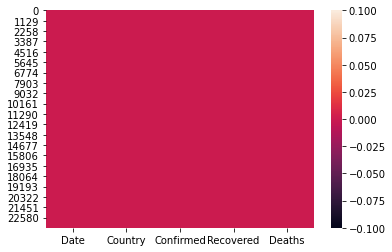

In [15]:
sn.heatmap(df.isnull())

# Finding Total Number of Deaths

In [17]:
cntr=df["Country"]=="China"
df_new=df[cntr]
column = df_new["Deaths"]
max_value = column.max()
print(max_value)

4638


In [18]:
group = df.groupby('Country')

df2 = group.apply(lambda x: x['Deaths'].max())
df2 = df2.apply(pd.Series)
df2

,0
Country,
Afghanistan,220
Albania,33
Algeria,617
Andorra,51
Angola,4
...,...
West Bank and Gaza,3
Western Sahara,1
Yemen,49


In [19]:
column_name = 0
column_sum = df2[column_name].sum()
column_sum

352093

The total number of deaths are 352093